# Interpolation

**Learning Objective:** Learn to interpolate 1d and 2d datasets of structured and unstructured points using SciPy.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Overview

We have already seen how to evaluate a Python function at a set of numerical points:

$$ f(x) \rightarrow f_i = f(x_i) $$

Here is an array of points:

In [3]:
x = np.linspace(0,4*np.pi,10)
x

array([  0.        ,   1.3962634 ,   2.7925268 ,   4.1887902 ,
         5.58505361,   6.98131701,   8.37758041,   9.77384381,
        11.17010721,  12.56637061])

This creates a new array of points that are the values of $\sin(x_i)$ at each point $x_i$:

In [4]:
f = np.sin(x)
f

array([  0.00000000e+00,   9.84807753e-01,   3.42020143e-01,
        -8.66025404e-01,  -6.42787610e-01,   6.42787610e-01,
         8.66025404e-01,  -3.42020143e-01,  -9.84807753e-01,
        -4.89858720e-16])

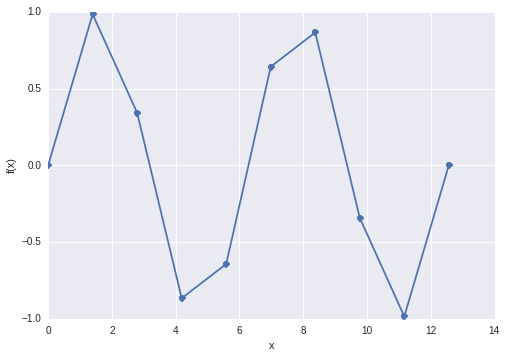

In [5]:
plt.plot(x, f, marker='o')
plt.xlabel('x')
plt.ylabel('f(x)');

This plot shows that the points in this numerical array are an approximation to the actual function as they don't have the function's value at all possible points. In this case we know the actual function ($\sin(x)$). What if we only know the value of the function at a limited set of points, and don't know the analytical form of the function itself? This is common when the data points come from a set of measurements.

[Interpolation](http://en.wikipedia.org/wiki/Interpolation) is a numerical technique that enables you to construct an approximation of the actual function from a set of points:

$$ \{x_i,f_i\} \rightarrow f(x) $$

It is important to note that unlike curve fitting or regression, interpolation doesn't not allow you to incorporate a *statistical model* into the approximation. Because of this, interpolation has limitations:

* It cannot accurately construct the function's approximation outside the limits of the original points.
* It cannot tell you the analytical form of the underlying function.

Once you have performed interpolation you can:

* Evaluate the function at other points not in the original dataset.
* Use the function in other calculations that require an actual function.
* Compute numerical derivatives or integrals.
* Plot the approximate function on a finer grid that the original dataset.

**Warning:**

The different functions in SciPy work with a range of different 1d and 2d arrays. To help you keep all of that straight, I will use lowercase variables for 1d arrays (`x`, `y`) and uppercase variables (`X`,`Y`) for 2d arrays. 

## 1d data

We begin with a 1d interpolation example with regularly spaced data. The function we will use it `interp1d`:

In [6]:
from scipy.interpolate import interp1d

Let's create the numerical data we will use to build our interpolation.

In [7]:
x = np.linspace(0,4*np.pi,10) # only use 10 points to emphasize this is an approx
f = np.sin(x)

To create our approximate function, we call `interp1d` as follows, with the numerical data. Options for the `kind` argument includes:

* `linear`: draw a straight line between initial points.
* `nearest`: return the value of the function of the nearest point.
* `slinear`, `quadratic`, `cubic`: use a spline (particular kinds of piecewise polynomial of a given order.

The most common case you will want to use is `cubic` spline (try other options):

In [8]:
sin_approx = interp1d(x, f, kind='cubic')

The `sin_approx` variabl that `interp1d` returns is a callable object that can be used to compute the approximate function at other points. Compute the approximate function on a fine grid:

In [9]:
newx = np.linspace(0,4*np.pi,100)
newf = sin_approx(newx)

Plot the original data points, along with the approximate interpolated values. It is quite amazing to see how the interpolation has done a good job of reconstructing the actual function with relatively few points.

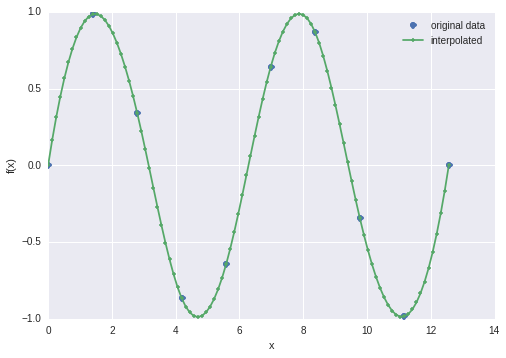

In [10]:
plt.plot(x, f, marker='o', linestyle='', label='original data')
plt.plot(newx, newf, marker='.', label='interpolated');
plt.legend();
plt.xlabel('x')
plt.ylabel('f(x)');

Let's look at the absolute error between the actual function and the approximate interpolated function:

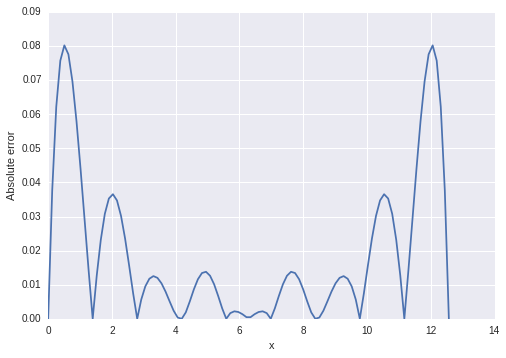

In [11]:
plt.plot(newx, np.abs(np.sin(newx)-sin_approx(newx)))
plt.xlabel('x')
plt.ylabel('Absolute error');

## 1d non-regular data

It is also possible to use `interp1d` when the x data is not regularly spaced. To show this, let's repeat the above analysis with randomly distributed data in the range $[0,4\pi]$. Everything else is the same.

In [12]:
x = 4*np.pi*np.random.rand(15)
f = np.sin(x)

In [13]:
sin_approx = interp1d(x, f, kind='cubic')

In [14]:
# We have to be careful about not interpolating outside the range
newx = np.linspace(np.min(x), np.max(x),100)
newf = sin_approx(newx)

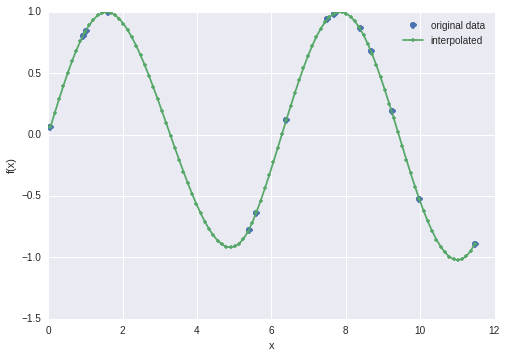

In [15]:
plt.plot(x, f, marker='o', linestyle='', label='original data')
plt.plot(newx, newf, marker='.', label='interpolated');
plt.legend();
plt.xlabel('x')
plt.ylabel('f(x)');

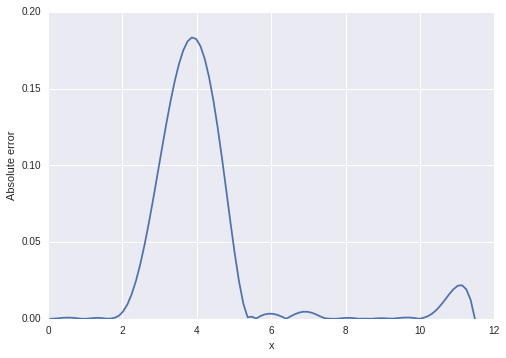

In [16]:
plt.plot(newx, np.abs(np.sin(newx)-sin_approx(newx)))
plt.xlabel('x')
plt.ylabel('Absolute error');

Notice how the absolute error is larger in the intervals where there are no points.

## 2d structured

For the 2d case we want to construct a scalar function of two variables, given

$$ {x_i, y_i, f_i} \rightarrow f(x,y) $$

For now, we will assume that the points $\{x_i,y_i\}$ are on a structured grid of points. This case is covered by the `interp2d` function:

In [17]:
from scipy.interpolate import interp2d

Here is the actual function we will use the generate our original dataset:

In [18]:
def wave2d(x, y):
    return np.sin(2*np.pi*x)*np.sin(3*np.pi*y)

Build 1d arrays to use as the structured grid:

In [19]:
x = np.linspace(0.0, 1.0, 10)
y = np.linspace(0.0, 1.0, 10)

Build 2d arrays to use in computing the function on the grid points:

In [20]:
X, Y = np.meshgrid(x, y)
Z = wave2d(X, Y)

Here is a scatter plot of the points overlayed with the value of the function at those points:

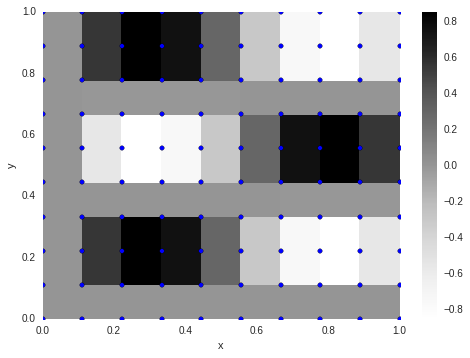

In [21]:
plt.pcolor(X, Y, Z)
plt.colorbar();
plt.scatter(X, Y);
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y');

You can see in this plot that the function is not smooth as we don't have its value on a fine grid.

Now let's compute the interpolated function using `interp2d`. Notice how we are passing 2d arrays to this function:

In [22]:
wave2d_approx = interp2d(X, Y, Z, kind='cubic')

Compute the interpolated function on a fine grid:

In [23]:
xnew = np.linspace(0.0, 1.0, 40)
ynew = np.linspace(0.0, 1.0, 40)
Xnew, Ynew = np.meshgrid(xnew, ynew) # We will use these in the scatter plot below
Fnew = wave2d_approx(xnew, ynew) # The interpolating function automatically creates the meshgrid!

In [24]:
Fnew.shape

(40, 40)

Plot the original course grid of points, along with the interpolated function values on a fine grid:

In [39]:
plt.pcolor(xnew, ynew, Fnew);
plt.colorbar();
plt.scatter(X, Y, label='original points')
plt.scatter(Xnew, Ynew, marker='.', color='green', label='interpolated points')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y');
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.);

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

Notice how the interpolated values (green points) are now smooth and continuous. The amazing thing is that the interpolation algorithm doesn't know anything about the actual function. It creates this nice approximation using only the original course grid (blue points).

## 2d unstructured

It is also possible to perform interpolation when the original data is not on a regular grid. For this, we will use the `griddata` function:

In [26]:
from scipy.interpolate import griddata

There is an important difference between `griddata` and the `interp1d`/`interp2d`:

* `interp1d` and `interp2d` return callable Python objects (functions).
* `griddata` returns the interpolated function evaluated on a finer grid.

This means that you have to pass `griddata` an array that has the finer grid points to be used. Here is the course unstructured grid we will use:

In [27]:
x = np.random.rand(100)
y = np.random.rand(100)

Notice how we pass these 1d arrays to our function and don't use `meshgrid`:

In [28]:
f = wave2d(x, y)

It is clear that our grid is very unstructured:

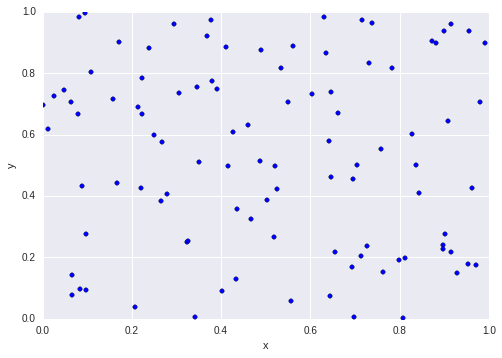

In [29]:
plt.scatter(x, y);
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y');

To use `griddata` we need to compute the final (strcutured) grid we want to compute the interpolated function on:

In [30]:
xnew = np.linspace(x.min(), x.max(), 40)
ynew = np.linspace(y.min(), y.max(), 40)
Xnew, Ynew = np.meshgrid(xnew, ynew)

In [31]:
Xnew.shape, Ynew.shape

((40, 40), (40, 40))

In [32]:
Fnew = griddata((x,y), f, (Xnew, Ynew), method='cubic', fill_value=0.0)

In [33]:
Fnew.shape

(40, 40)

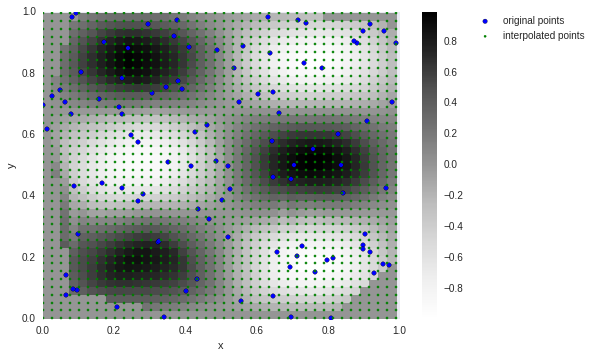

In [34]:
plt.pcolor(Xnew, Ynew, Fnew, label="points")
plt.colorbar()
plt.scatter(x, y, label='original points')
plt.scatter(Xnew, Ynew, marker='.', color='green', label='interpolated points')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y');
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.);

Notice how the interpolated function is smooth in the interior regions where the original data is defined. However, outside those points, the interpolated function is missing (it returns `nan`).